# Problem Statement

You have been hired as a consultant to a start-up that is running a targetted marketing ads on facebook. The company wants to anaylze customer behaviour by predicting which customer clicks on the advertisement. Customer data is as follows: 

Inputs: 
- Name 
- e-mail 
- Country 
- Time on Facebook 
- Estimated Salary (derived from other parameters)

Outputs:
- Click (1: customer clicked on Ad, 0: Customer did not click on the Ad)

In [1]:
# Importing the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the Dataset

df = pd.read_csv('Facebook_Ads_2.csv', encoding='ISO-8859-1') # As our Dataset contains lots of Special Charecters (emails etc.)
df.head()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


In [3]:
# Identify and Explore the Dataset

click = df [df["Clicked"] == 1 ]
not_clicked = df [df["Clicked"] == 0 ]

print("Total Samples in the Data is: ", len(df))
print("Number of Clicks is: ", len(click))
print("Number of No Clicks is: ", len(not_clicked))

print("The Percentage of Clicks is {:.2f}% ".format( len(click) / len(df) * 100))
print("The Percentage of No Clicks is {:.2f}% ".format( len(not_clicked) / len(df) * 100))

Total Samples in the Data is:  499
Number of Clicks is:  250
Number of No Clicks is:  249
The Percentage of Clicks is 50.10% 
The Percentage of No Clicks is 49.90% 


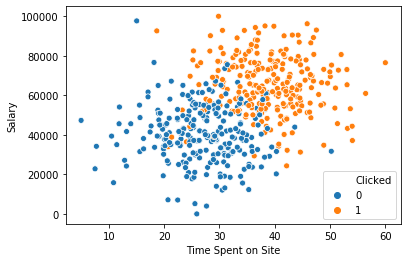

In [4]:
# Plot Time spent on site and Salary

sns.scatterplot(df['Time Spent on Site'], df['Salary'], hue = 'Clicked', data= df);

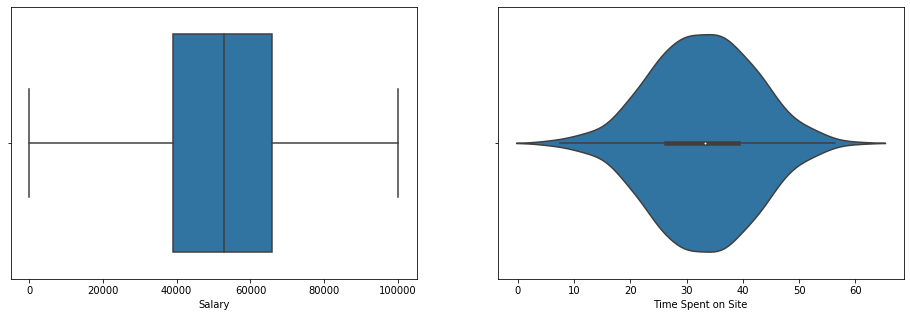

In [5]:
# Get Boxplot for Salaty and Time spent

plt.figure(figsize= (16,5))

# Plot Salary
plt.subplot(1,2,1)
sns.boxplot(df['Salary'])

# Plot Time spent
plt.subplot(1,2,2)
sns.violinplot(df['Time Spent on Site']);

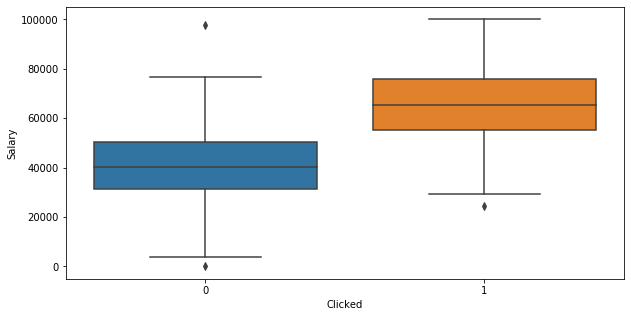

In [6]:
# Plot Salary Boxplot

plt.figure(figsize= (10,5))
sns.boxplot(x= 'Clicked', y= 'Salary', data= df);

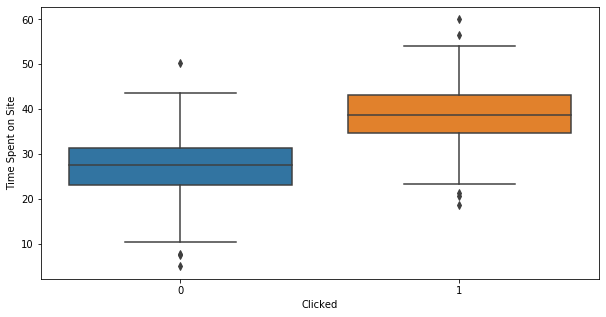

In [7]:
# Plot Time Spent Boxplot

plt.figure(figsize= (10,5))
sns.boxplot(x= 'Clicked', y= 'Time Spent on Site', data= df);

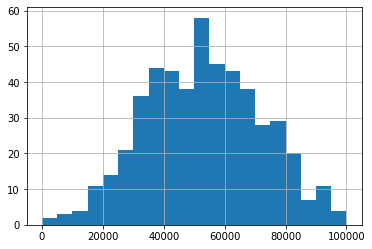

In [8]:
# Plot Histogram of Salary
df['Salary'].hist(bins = 20);

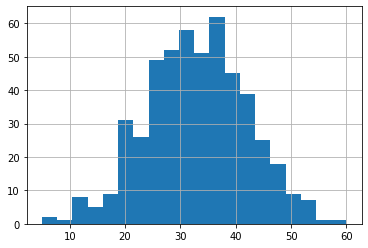

In [9]:
# Plot a Histogram for Time Spent on Site Column

df['Time Spent on Site'].hist(bins= 20);

In [10]:
# Data Processing

# Dropping Email, Country and Name

df.drop(['Country', 'Names', 'emails'], axis= 1, inplace= True)

df.head()

,Time Spent on Site,Salary,Clicked
0,25.649648,55330.06006,0
1,32.456107,79049.07674,1
2,20.945978,41098.60826,0
3,54.039325,37143.35536,1
4,34.249729,37355.11276,0


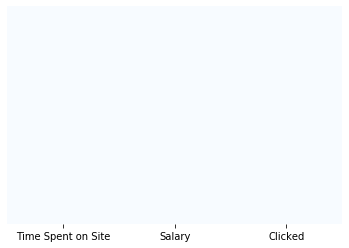

In [11]:
# Data Analysis

# Test for Missing Values

sns.heatmap(df.isnull(), yticklabels= False, cbar= False, cmap= 'Blues'); # Remove y Axis Labels and Progress bar heatmap
# All Null Elements are Replaced 

### Model Building

In [12]:
# Segment X and y Data

X = df.drop('Clicked', axis=1).values # Train X as Arrays (np.array)
y = df['Clicked'].values # Train y as Arrays

In [13]:
# Validation

X[:5], y[:5]

(array([[2.56496480e+01, 5.53300601e+04],
        [3.24561067e+01, 7.90490767e+04],
        [2.09459779e+01, 4.10986083e+04],
        [5.40393248e+01, 3.71433554e+04],
        [3.42497288e+01, 3.73551128e+04]]),
 array([0, 1, 0, 1, 0], dtype=int64))

In [14]:
# Feature Engineering as Time Spent on Site and Salary are hugely different 

# Data Normalisation
from sklearn.preprocessing import StandardScaler

# Instantiate the Object
scaler = StandardScaler()

# Apply it
X = scaler.fit_transform(X)

In [15]:
# Validate after Scaling
X[:5]

array([[-0.79945766,  0.12825771],
       [-0.05102869,  1.37859159],
       [-1.31666684, -0.62194482],
       [ 2.3222327 , -0.83044362],
       [ 0.14619557, -0.81928096]])

In [16]:
# Importing Train Test Split, Model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [17]:
# Split the Data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

# Get the Shape of X_train, X_test, y_train, y_test 

print(" The Shape of X_train is {}, X_test is {}, y_train is {}, y_test is {}.".format(X_train.shape,
                                                                                       X_test.shape,
                                                                                       y_train.shape,
                                                                                       y_test.shape))

 The Shape of X_train is (399, 2), X_test is (100, 2), y_train is (399,), y_test is (100,).


In [18]:
# Import Logistic Regression library from the Dataset

from sklearn.linear_model import LogisticRegression

# Instantiate it
classifier = LogisticRegression(random_state= 42)

# Fit the Data
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
# Predicting the Results

y_predict = classifier.predict(X_test)
Y_predict_proba = classifier.predict_proba(X_test)

In [20]:
# Check for Predict proba

for i, j in zip(y_predict[:5], Y_predict_proba[:5]):
    print("The Probablity for Predicted class \"{}\" is this: {}".format(i, j))

The Probablity for Predicted class "0" is this: [0.93203562 0.06796438]
The Probablity for Predicted class "0" is this: [0.79098897 0.20901103]
The Probablity for Predicted class "1" is this: [0.30890966 0.69109034]
The Probablity for Predicted class "0" is this: [0.97871362 0.02128638]
The Probablity for Predicted class "1" is this: [0.36778666 0.63221334]


In [21]:
# Importing the Metrics

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

              precision    recall  f1-score   support

           0       0.98      0.89      0.93        61
           1       0.84      0.97      0.90        39

    accuracy                           0.92       100
   macro avg       0.91      0.93      0.92       100
weighted avg       0.93      0.92      0.92       100



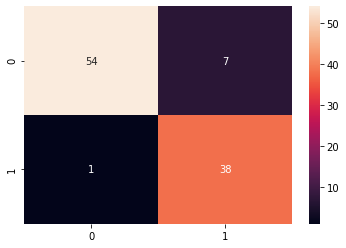

In [22]:
# Implement Confusion matrix

cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot= True, fmt= '.2g')

# get Classification Report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       188
           1       0.91      0.92      0.91       211

    accuracy                           0.91       399
   macro avg       0.91      0.91      0.91       399
weighted avg       0.91      0.91      0.91       399



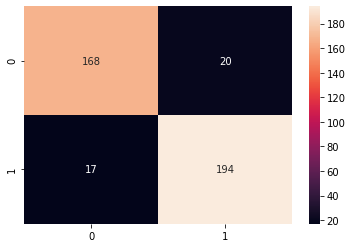

In [23]:
# Fun Check

# Check for Predictions for Training

y_predict_train = classifier.predict(X_train)

# Implement Confusion matrix

cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot= True, fmt= 'd') # Fmt helps in Annotation values

# get Classification Report

print(classification_report(y_train, y_predict_train))

## Visualising the Data via Decision Boundary

In [24]:
# Decision Boundary for Test set.

# The Blue and violet background is called the Model Predictions (Points that fall in that region are classified)

# Import the ColorMap
from matplotlib.colors import ListedColormap
# Set X and y
X_set, y_set = X_test, y_test
# Keep copy of X_test, y_test if needed

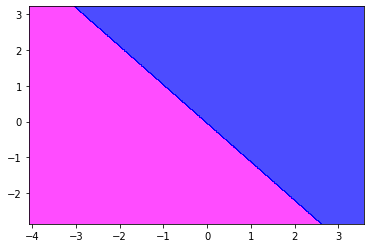

In [25]:
# Create Meshgrid via (a)Range and numbers, and Flatten it - This helps in Creating Grid. Range helps pick Resolution
X1, X2 = np.meshgrid( np.arange( start= X_set[:,0].min() -1 , stop= X_set[:,0].max() + 1 , step= 0.01),
                      np.arange( start= X_set[:,1].min() -1 , stop= X_set[:,1].max() + 1 , step= 0.01)) # Step increments in .01

# Plot the Decision Boundary that falls inside the Grid
plt.contourf(X1, X2, classifier.predict( np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha= 0.7, cmap= ListedColormap(( 'magenta', 'blue' )) );

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


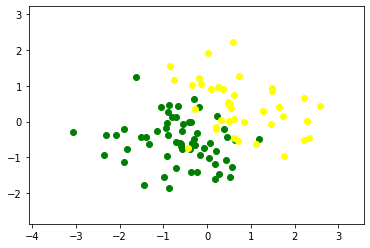

In [26]:
# Plot the Points

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Loop through Positive and Negative Class and Apply Scatter Plot

for i,j in enumerate(np.unique(y_set)):
    # Plot the Scatter Plots
    plt.scatter(X_set[ y_set == j, 0], X_set[ y_set ==j, 1],
                c= ListedColormap(('green', 'yellow')) (i), label= j);

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


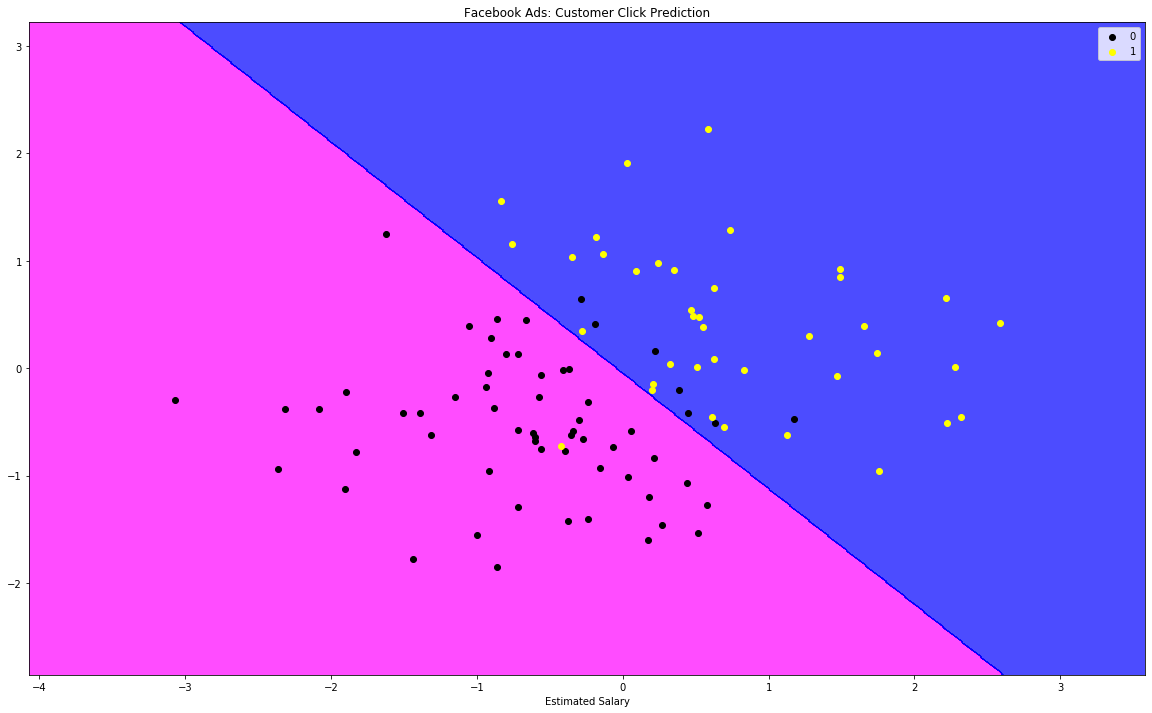

In [27]:
# Bring the Both Together

plt.figure(figsize= (20, 12))

# Create Meshgrid via (a)Range and numbers, and Flatten it - This helps in Creating Grid. Range helps pick Resolution
X1, X2 = np.meshgrid( np.arange( start= X_set[:,0].min() -1 , stop= X_set[:,0].max() + 1 , step= 0.01),
                      np.arange( start= X_set[:,1].min() -1 , stop= X_set[:,1].max() + 1 , step= 0.01)) # Step increments in .01

# Plot the Decision Boundary that falls inside the Grid
plt.contourf(X1, X2, classifier.predict( np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha= 0.7, cmap= ListedColormap(( 'magenta', 'blue' )) );

# Plot the Points

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Loop through Positive and Negative Class and Apply Scatter Plot

for i,j in enumerate(np.unique(y_set)):
    # Plot the Scatter Plots
    plt.scatter(X_set[ y_set == j, 0], X_set[ y_set ==j, 1],
                c= ListedColormap(('black', 'yellow')) (i), label= j);
    
# Add the Titles

plt.title("Facebook Ads: Customer Click Prediction")
plt.xlabel("Time Spent on Site")
plt.xlabel("Estimated Salary")
plt.legend()
plt.show();

#### Testing Decision Boundary for Training Dataset

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


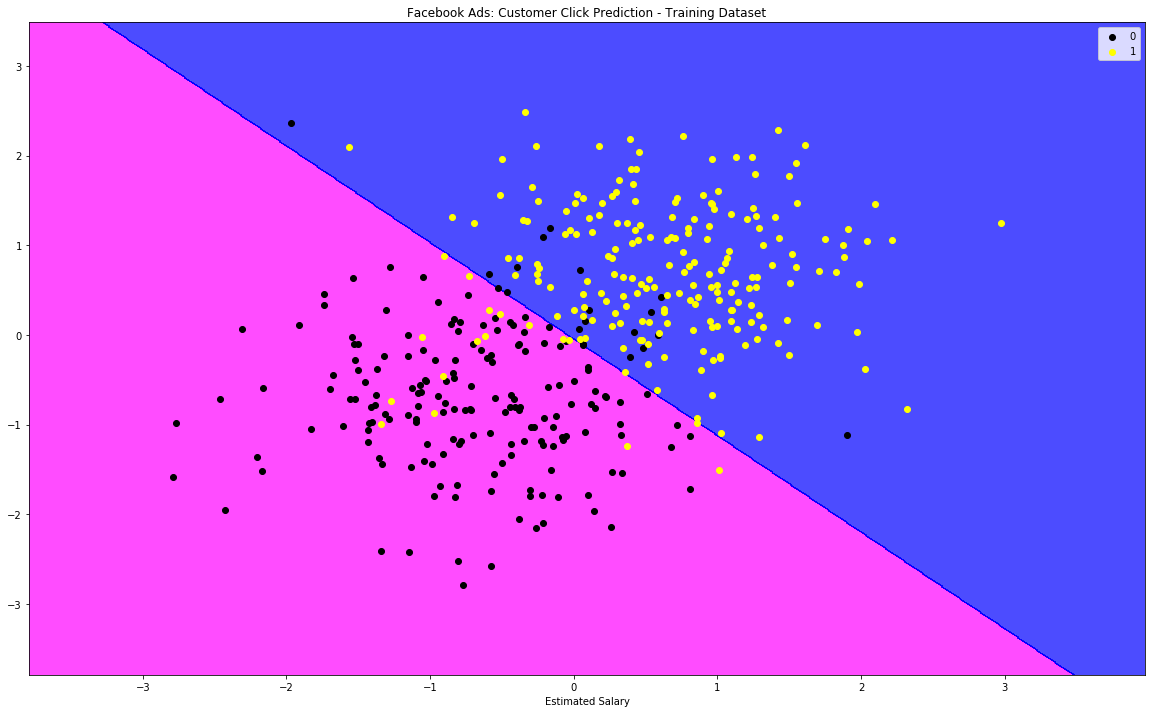

In [28]:
# Decision Boundary for Training set.

# The Blue and violet background is called the Model Predictions (Points that fall in that region are classified)

plt.figure(figsize= (20, 12))

# Set X and y for Training Dataset


X_set, y_set = X_train, y_train

# Create Meshgrid via (a)Range and numbers, and Flatten it - This helps in Creating Grid. Range helps pick Resolution
X1, X2 = np.meshgrid( np.arange( start= X_set[:,0].min() -1 , stop= X_set[:,0].max() + 1 , step= 0.01),
                      np.arange( start= X_set[:,1].min() -1 , stop= X_set[:,1].max() + 1 , step= 0.01)) # Step increments in .01

# Plot the Decision Boundary that falls inside the Grid
plt.contourf(X1, X2, classifier.predict( np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha= 0.7, cmap= ListedColormap(( 'magenta', 'blue' )) );

# Plot the Points

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Loop through Positive and Negative Class and Apply Scatter Plot

for i,j in enumerate(np.unique(y_set)):
    # Plot the Scatter Plots
    plt.scatter(X_set[ y_set == j, 0], X_set[ y_set ==j, 1],
                c= ListedColormap(('black', 'yellow')) (i), label= j);
    
# Add the Titles

plt.title("Facebook Ads: Customer Click Prediction - Training Dataset")
plt.xlabel("Time Spent on Site")
plt.xlabel("Estimated Salary")
plt.legend()
plt.show();